<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 4.2
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Introducción**

Este código utiliza programación genética para diseñar circuitos lógicos que simulan el comportamiento de un display de 7 segmentos, aplicando compuertas lógicas como AND, OR y XOR. La estructura del algoritmo genético involucra la creación de individuos (circuitos lógicos) que se evalúan en función de su capacidad para generar una salida correcta que se corresponda con la representación de segmentos de un número en un display. Mediante selección, cruce y mutación, el algoritmo busca optimizar la solución a lo largo de varias generaciones. La evaluación de los circuitos se realiza comparando su salida con la salida esperada, y la función de fitness premia aquellos circuitos que logran una mayor coincidencia con la salida correcta en términos de segmentos activados.

# <> **Desarrollo**

Generación 0: Mejor fitness 6.0
Generación 1: Mejor fitness 6.0
Generación 2: Mejor fitness 6.0
Generación 3: Mejor fitness 6.0
Generación 4: Mejor fitness 6.0
Generación 5: Mejor fitness 6.0
Generación 6: Mejor fitness 6.0
Generación 7: Mejor fitness 6.0
Generación 8: Mejor fitness 6.0
Generación 9: Mejor fitness 6.0
Generación 10: Mejor fitness 6.0
Generación 11: Mejor fitness 6.0
Generación 12: Mejor fitness 6.0
Generación 13: Mejor fitness 6.0
Generación 14: Mejor fitness 6.0
Generación 15: Mejor fitness 6.0
Generación 16: Mejor fitness 6.0
Generación 17: Mejor fitness 6.0
Generación 18: Mejor fitness 6.0
Generación 19: Mejor fitness 6.0
Generación 20: Mejor fitness 6.0
Generación 21: Mejor fitness 6.0
Generación 22: Mejor fitness 6.0
Generación 23: Mejor fitness 6.0
Generación 24: Mejor fitness 6.0
Generación 25: Mejor fitness 6.0
Generación 26: Mejor fitness 6.0
Generación 27: Mejor fitness 6.0
Generación 28: Mejor fitness 6.0
Generación 29: Mejor fitness 6.0
Generación 30: Mejor

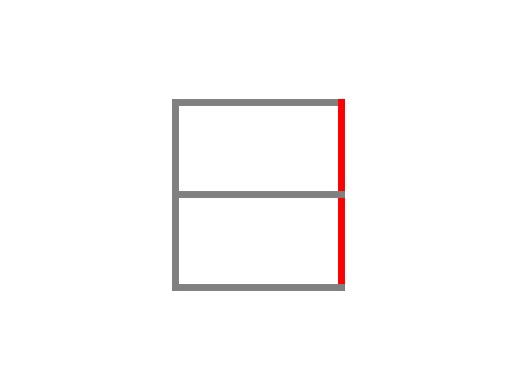

In [10]:
#!pip install networkx matplotlib deap

import random
import networkx as nx
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


# --------------------- CONFIGURACIÓN DEL PROBLEMA ---------------------
GATE_TYPES = ["AND", "OR", "XOR"]  # Tipos de compuertas lógicas disponibles
NUM_GATES = 6  # Número de compuertas intermedias

# Mapeo de salida decimal a segmentos activados en un display de 7 segmentos
SEGMENT_MAP = {
    0: ["a", "b", "c", "d", "e", "f"],
    1: ["b", "c"],
    2: ["a", "b", "g", "e", "d"],
    3: ["a", "b", "g", "c", "d"],
    4: ["f", "g", "b", "c"],
    5: ["a", "f", "g", "c", "d"],
    6: ["a", "f", "g", "e", "c", "d"],
    7: ["a", "b", "c"]
}

# Función para evaluar las compuertas lógicas
def apply_gate(gate_type, a, b):
    if gate_type == "AND":
        return a & b
    elif gate_type == "OR":
        return a | b
    elif gate_type == "XOR":
        return a ^ b
    return 0

# Evaluar un circuito con un conjunto de entradas
def evaluate_circuit(inputs_values, circuit):
    values = {f"ARG{i}": inputs_values[i] for i in range(len(inputs_values))}

    values["GATE0"] = apply_gate(circuit[0], values["ARG2"], values["ARG1"])
    values["GATE1"] = apply_gate(circuit[1], values["ARG2"], values["ARG0"])
    values["GATE2"] = apply_gate(circuit[2], values["GATE0"], 1)
    values["GATE3"] = apply_gate(circuit[3], values["GATE2"], values["GATE1"])
    values["GATE4"] = apply_gate(circuit[4], values["GATE3"], values["ARG0"])
    values["GATE5"] = apply_gate(circuit[5], values["GATE1"], values["GATE4"])

    return values["GATE5"]

# Función para mostrar el número en un display de 7 segmentos
def draw_seven_segment(segments):
    fig, ax = plt.subplots()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-2, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    segment_coords = {
        "a": [(0.5, 1), (-0.5, 1)],
        "b": [(0.5, 1), (0.5, 0)],
        "c": [(0.5, 0), (0.5, -1)],
        "d": [(0.5, -1), (-0.5, -1)],
        "e": [(-0.5, -1), (-0.5, 0)],
        "f": [(-0.5, 0), (-0.5, 1)],
        "g": [(0.5, 0), (-0.5, 0)]
    }

    for segment, coords in segment_coords.items():
        color = 'red' if segment in segments else 'gray'
        ax.plot([coords[0][0], coords[1][0]], [coords[0][1], coords[1][1]], linewidth=5, color=color)

    plt.show()

# --------------------- PROGRAMACIÓN GENÉTICA ---------------------
# Definimos los componentes del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar la salida correcta
creator.create("Individual", list, fitness=creator.FitnessMax)

# Función para generar un individuo aleatorio (circuito lógico)
def create_individual():
    return [random.choice(GATE_TYPES) for _ in range(NUM_GATES)]

# Función de evaluación de fitness: evalúa cómo de bien un circuito genera la salida correcta
def evaluate(individual):
    # Simulamos las entradas aleatorias
    test_inputs = [random.randint(0, 1) for _ in range(3)]
    decimal_output = int("".join(map(str, test_inputs)), 2)
    segment_output = SEGMENT_MAP.get(decimal_output, [])

    # Evaluamos el circuito
    circuit_output = evaluate_circuit(test_inputs, individual)

    # Calculamos la diferencia entre la salida del circuito y la salida esperada
    fitness = sum([1 if segment in segment_output else 0 for segment in SEGMENT_MAP[decimal_output]])

    return (fitness,)

# Operadores genéticos
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(GATE_TYPES)-1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# --------------------- ALGORITMO GENÉTICO ---------------------
def main():
    population = toolbox.population(n=100)

    # Algoritmo genético
    for gen in range(50):  # 50 generaciones
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:  # Probabilidad de cruce
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:  # Probabilidad de mutación
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluación
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_individuals)
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring
        print(f"Generación {gen}: Mejor fitness {max([ind.fitness.values[0] for ind in population])}")

    # Mostrar el mejor circuito
    best_individual = tools.selBest(population, 1)[0]
    print("Mejor circuito encontrado:", best_individual)

    # Mostrar las entradas y el número decimal
    test_inputs = [random.randint(0, 1) for _ in range(3)]
    decimal_output = int("".join(map(str, test_inputs)), 2)
    print(f"Entradas: {test_inputs} → Número decimal: {decimal_output}")

    segment_output = SEGMENT_MAP.get(decimal_output, [])
    draw_seven_segment(segment_output)

if __name__ == "__main__":
    main()



# **<> Conclusiones**

El uso de programación genética en este código demuestra su efectividad para optimizar circuitos lógicos que simulan el comportamiento de un display de 7 segmentos. A través de la evolución de generaciones, el algoritmo mejora progresivamente los individuos, permitiendo encontrar soluciones cada vez más precisas. Esto muestra cómo los métodos evolutivos pueden ser aplicados en problemas de diseño de circuitos lógicos, evidenciando su potencial para resolver problemas complejos de manera eficiente, a la vez que proporcionan una forma adaptable y flexible de encontrar soluciones óptimas sin necesidad de un conocimiento explícito de las respuestas correctas desde el principio.